# Quét tài liệu (tách nền):

In [1]:
import cv2
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import imutils

# import the necessary packages
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local

from imutils import contours
%matplotlib inline

--- 
## I. Sử dụng OpenCV

In [2]:
def Document_Scanning(file_name):
    
    # Đọc file ảnh và điều chỉnh kích thước (giúp chương trình chạy nhanh hơn)
    image = cv2.imread(file_name)
    ratio = image.shape[0] / 500.0
    orig = image.copy()
    image = imutils.resize(image, height = 500)
    
    
    # Chuyển sang ảnh gray, làm trơn ảnh bằng phương pháp Gaussian
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    #Xác định biên cạnh bằng phương pháp Canny
    edged = cv2.Canny(gray, 75, 200)

    # Tìm đường viền của tài liệu:
    # giả định rằng các đường bao lớn nhất trong hình ảnh (chính xác bốn viền) là mảnh giấy đang xét.
    tmp = cv2.findContours(edged,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = tmp[0] if len(tmp) == 2 else tmp[1]

    # phải chắc rằng có nhiều hơn 1 contour được tìm thấy
    if len(cnts) > 0:
    # săp xếp các contour tìm được
    # theo thứ tự lớn tới bé
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    #Xét trong các contour
    for c in cnts:
        # Ước lượng đường viền
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # nếu approximated contour bằng 4 điểm
        # thì nó chính là 4 góc của mảnh giấy
        if len(approx) == 4:
            docCnt = approx
            break

    # Đóng khung,  Màu khung: (0, 255, 0)
    cv2.drawContours(image, [docCnt], -1, (0, 255, 0), 2)
    
    # 
    warped = four_point_transform(orig, docCnt.reshape(4, 2) * ratio)
    
    # chuyển đổi hình ảnh bị cong vênh sang thang độ xám, sau đó định ngưỡng nó 
    # để tạo hiệu ứng đen trắng (như tài liệu)
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    T = threshold_local(warped, 11, offset = 10, method = "gaussian")
    warped = (warped > T).astype("uint8") * 255
    
    return warped


---

## II. Chạy và hiển thị kết quả:

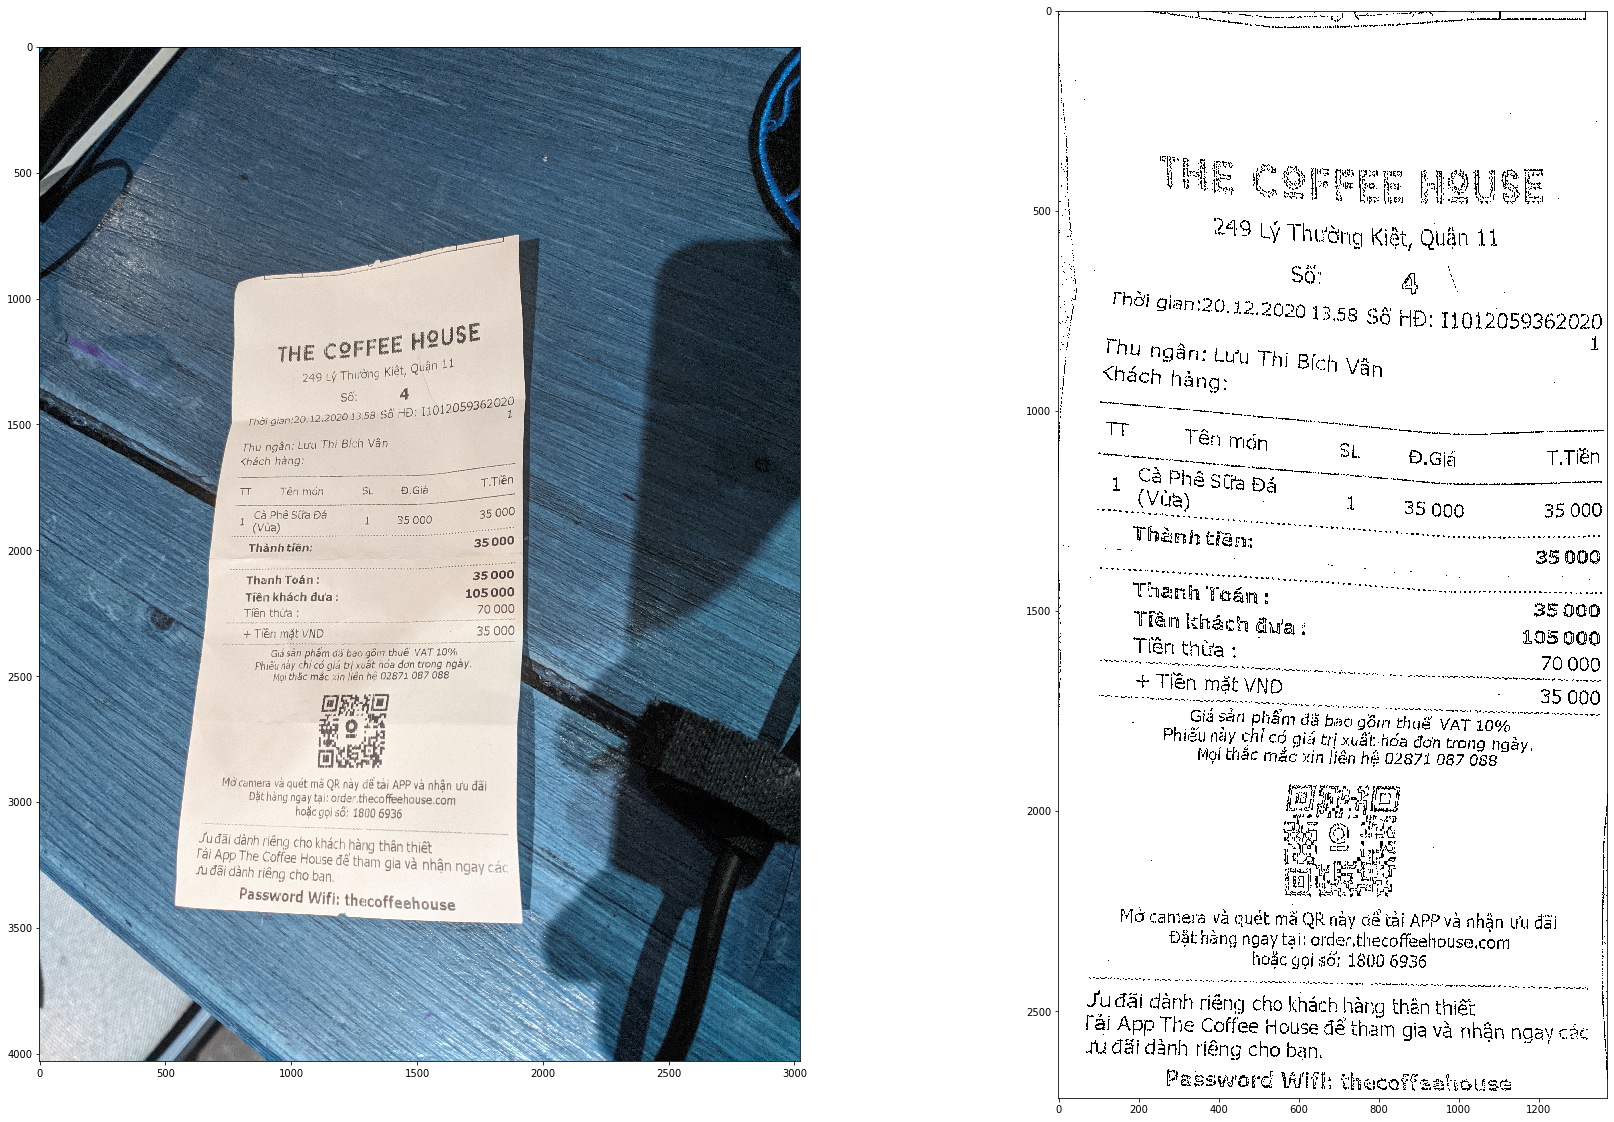

In [30]:
#Hiển thị kết quả
#Đọc ảnh input
file_name = 'test_2.jpg'
image_input = cv2.imread(file_name)
plt.rcParams["figure.figsize"] = (30,20)

#Tạo khung hiển thị 1 hàng, 2 cột
f, axarr = plt.subplots(1,2) 

#Gán ảnh output
image_output = cv2.cvtColor(Document_Scanning(file_name), cv2.COLOR_GRAY2BGR)
cv2.imwrite('result.png', image_output)
#Hiển thị
plt.imshow(image_output, interpolation='nearest')
axarr[0].imshow(image_input)
axarr[1].imshow(image_output)

# cv2.imshow('image window', Document_Scanning('test_4.jpg'))
# cv2.waitKey(0)

---

In [4]:
Document_Scanning(file_name)

array([[255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255,   0, 255],
       [  0, 255, 255, ...,   0,   0, 255],
       [  0,   0, 255, ..., 255, 255, 255]], dtype=uint8)

**Đánh giá:** Thuật toán chưa chuẩn xác khi tách hóa đơn trên nền phức tạp (đồng màu, nhiều họa tiết nhiễu).

## III. Tài liệu tham khảo:

Link tham khảo: 

- [Link 1](https://stackoverflow.com/questions/55513477/how-to-find-the-document-edges-in-various-coloured-backgrounds-using-opencv-pyth)

- [Link 2](https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/)

- [Link 3](https://congdongopencv.blogspot.com/2017/12/su-dung-xu-ly-anh-thu-vien-opencv-viet.html)

KeyWord: How to find the document edges in various coloured backgrounds using opencv python? [Document Scanning in various backgrounds]


Mở rộng: [Quản lý chi tiêu.](https://www.diva-portal.org/smash/get/diva2:967971/FULLTEXT01.pdf) 

ORC (Optical Character Recognition | Nhận dạng ký tự quang học) Process: https://www.pyimagesearch.com/2020/09/07/ocr-a-document-form-or-invoice-with-tesseract-opencv-and-python/

https://www.pyimagesearch.com/2020/08/31/image-alignment-and-registration-with-opencv/

OCR with Tesseract: https://medium.com/@hasanat.abul/invoice-extraction-using-tesseract-ocr-2ec75813d59b

https://www.pyimagesearch.com/2017/07/10/using-tesseract-ocr-python/

# Mở rộng:

In [16]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os

In [17]:
# !pip install imutils
# !pip install pillow
# !pip install pytesseract

In [34]:
text = pytesseract.image_to_string(Image.open('result.png'), lang = "vie")

#Fix error: https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i

In [35]:
text

' \n\n \n\n|\n4\n4\n4\nvẠ\nm\n\nE =lỈ Thời giÌ\n\n \n\n \n\nu Ư S NG Ư UO B bầ sự\n\nHS Đ n an:\nL Y CâN đB3 Trex Bưa ppe3 lặ C v\n\nỀ ìỄP`ẦỀÌ -ẵììỂs H ỈỄ Ạ Ì l a v ỀẸ\' ìƯ] Ố ÍỄỈ\neưườii H C n H ¡ S eg c IẾ l u S H -\n\n \n\n49 Lý Thường Kiệt, Quận 11\n\nSố: á \\\'\\,\\\nan›20.12.2020 13.58 S\n\nThu ngân:\nxhách ham\n\n—-.\n—\n\n. HN\n\nLưu Thị Bích Vận\n\n50 HÐ: 1101205936.2020\n\nỬ Tên món SL Nẫ ễễ—WMT "Tiêền\n1 Cà Phê sữa ĐA T rm c rmv t tt\n......... Vùa) . 1- 35000 55 000\nThanij trêm i 35 000\n“U\'Lỉanh đoán: UU i 35 000\nTiên khách đưa : 105 000\nT1en tthJỂ` _ óỉh 70 000\n\n- + “l ken mat Vffl)N : 3ẫ OỔỔ\n\nCJla san pham da bac› gom thue VAT 10% „\nPhiếu này chỉ có giá trị xuất hóa đơn trong ngày,\nMọi thắc mắc xịn liên hệ 02871 087 088\n\nIEges\n\n.\n\nầ Ier C)J ulzz\'Ò\n\nuìg\nn\nMở camera và quét mã QF này để tải APP và nhận ưu đãi\n\nĐật hàng ngay tại: order,thecoffeehouse.com\nhoặc gcu số: 1800 6936\n\nJ\'u đal danh riêng cho khaụ_h hang than thlết\n\n[ải App The Coffee Ho

In [36]:
text.split('\n')

[' ',
 '',
 ' ',
 '',
 '|',
 '4',
 '4',
 '4',
 'vẠ',
 'm',
 '',
 'E =lỈ Thời giÌ',
 '',
 ' ',
 '',
 ' ',
 '',
 'u Ư S NG Ư UO B bầ sự',
 '',
 'HS Đ n an:',
 'L Y CâN đB3 Trex Bưa ppe3 lặ C v',
 '',
 "Ề ìỄP`ẦỀÌ -ẵììỂs H ỈỄ Ạ Ì l a v ỀẸ' ìƯ] Ố ÍỄỈ",
 'eưườii H C n H ¡ S eg c IẾ l u S H -',
 '',
 ' ',
 '',
 '49 Lý Thường Kiệt, Quận 11',
 '',
 "Số: á \\'\\,\\",
 'an›20.12.2020 13.58 S',
 '',
 'Thu ngân:',
 'xhách ham',
 '',
 '—-.',
 '—',
 '',
 '. HN',
 '',
 'Lưu Thị Bích Vận',
 '',
 '50 HÐ: 1101205936.2020',
 '',
 'Ử Tên món SL Nẫ ễễ—WMT "Tiêền',
 '1 Cà Phê sữa ĐA T rm c rmv t tt',
 '......... Vùa) . 1- 35000 55 000',
 'Thanij trêm i 35 000',
 "“U'Lỉanh đoán: UU i 35 000",
 'Tiên khách đưa : 105 000',
 'T1en tthJỂ` _ óỉh 70 000',
 '',
 '- + “l ken mat Vffl)N : 3ẫ OỔỔ',
 '',
 'CJla san pham da bac› gom thue VAT 10% „',
 'Phiếu này chỉ có giá trị xuất hóa đơn trong ngày,',
 'Mọi thắc mắc xịn liên hệ 02871 087 088',
 '',
 'IEges',
 '',
 '.',
 '',
 "ầ Ier C)J ulzz'Ò",
 '',
 'uìg',
 'n',
 'Mở c